# Linear Regression with ByteTorch
This notebook demonstrates how to build and train a simple linear regression model using the ByteTorch library.

# Import required libraries
We import numpy, matplotlib, and the necessary modules from ByteTorch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # so we can import from src if needed
from src.core.tensor import Tensor
from src.nn.linear import Linear
from src.optim.optimizers.SGD import SGD

# Generate synthetic data
We generate a simple linear dataset with noise for regression.

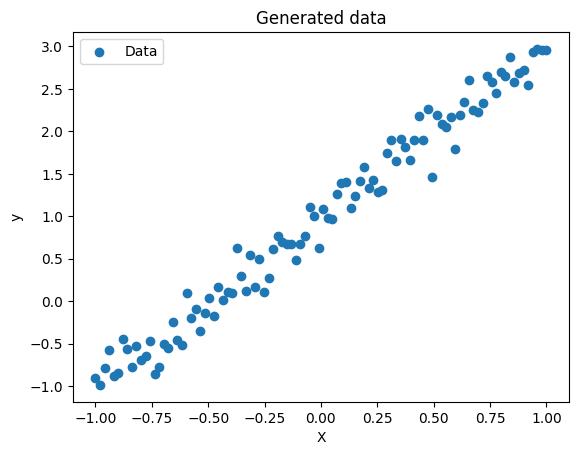

In [2]:
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y_true = 2.0 * X + 1.0 + 0.2 * np.random.randn(*X.shape)
plt.scatter(X, y_true, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated data')
plt.legend()
plt.show()

# Prepare data for ByteTorch
We convert numpy arrays to ByteTorch tensors.

In [3]:
X_tensor = Tensor(X, requires_grad=False)
y_tensor = Tensor(y_true, requires_grad=False)

# Build the model
We create a simple linear model using ByteTorch's Linear layer.

In [4]:
model = Linear(1, 1)  # input_dim=1, output_dim=1
print(f'Initial model parameters: weight={model.weights.data}, bias={model.bias.data}')
optimizer = SGD(model.parameters(), lr=0.01, momentum=0)

Initial model parameters: weight=[[-1.41537074]], bias=[-0.42064532]


# Training loop
We train the model using mean squared error loss and stochastic gradient descent.

In [7]:
def mse_loss(pred, target):
    diff = pred - target
    power = diff * diff
    return power.mean()

losses = []
for epoch in range(400):
    pred = model(X_tensor)
    loss = mse_loss(pred, y_tensor)
    losses.append(loss.data.item())
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 40 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.data.item():.4f}")

Epoch 40, Loss: 0.0426
Epoch 80, Loss: 0.0384
Epoch 120, Loss: 0.0359
Epoch 160, Loss: 0.0345
Epoch 200, Loss: 0.0337
Epoch 240, Loss: 0.0332
Epoch 280, Loss: 0.0330
Epoch 320, Loss: 0.0328
Epoch 360, Loss: 0.0327
Epoch 400, Loss: 0.0327


# Results visualization
We plot the loss curve and the fitted regression line.

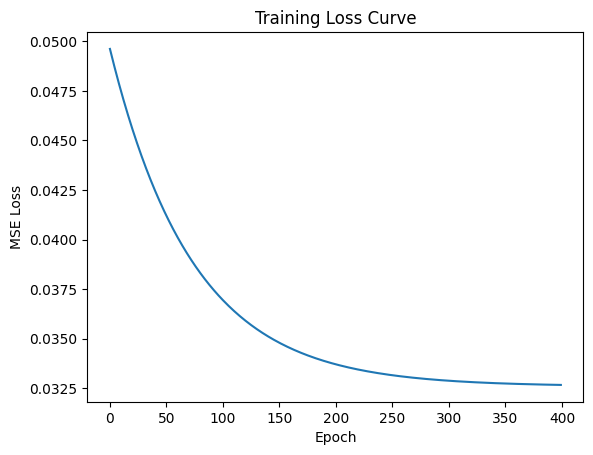

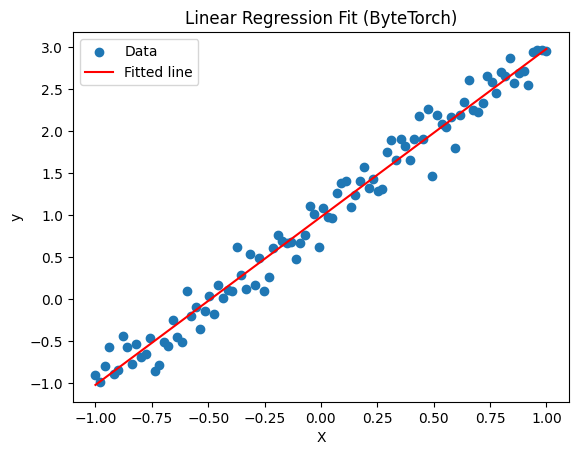

In [ ]:
# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')
plt.show()

# Plot regression line
y_pred = model(X_tensor).data
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit (ByteTorch)')
plt.legend()
plt.show()